<a href="https://colab.research.google.com/github/Wendy-Okoth/SeaTurtleDetectionModel/blob/main/My_SeaTurtle_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install ultralytics
!pip install -U opencv-python # Ensure you have the latest OpenCV for visualization
!pip install matplotlib
!pip install pandas # For handling the submission file

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm # For progress bar

# Define base directory where your processed dataset will live in Colab's local file system
BASE_DATA_DIR = '/content/turtle_face_detection_dataset'

# --- IMPORTANT: Adjust GOOGLE_DRIVE_DATA_FOLDER to your exact folder name! ---
# If your folder in Google Drive is named 'SeaTurtleDetectionData', use that.
# If it's something else, e.g., 'YOLO_Project', change it here.
GOOGLE_DRIVE_DATA_FOLDER = '/content/drive/MyDrive/SeaTurtleDetectionData' # <--- VERIFY THIS FOLDER NAME!

# Define the paths to your original downloaded files, now located in Google Drive
IMAGES_ZIP_PATH = os.path.join(GOOGLE_DRIVE_DATA_FOLDER, 'IMAGES_512.zip')
TRAIN_CSV_PATH = os.path.join(GOOGLE_DRIVE_DATA_FOLDER, 'Train.csv')
SAMPLE_SUBMISSION_PATH = os.path.join(GOOGLE_DRIVE_DATA_FOLDER, 'SampleSubmission.csv') # Good to define for later

# Define the YOLOv8 dataset structure paths (these remain on the Colab VM's local disk)
IMAGES_DIR_RAW = os.path.join(BASE_DATA_DIR, 'images_raw') # Temporary for unzipping
TRAIN_IMG_DIR = os.path.join(BASE_DATA_DIR, 'images', 'train')
VAL_IMG_DIR = os.path.join(BASE_DATA_DIR, 'images', 'val')
TRAIN_LABEL_DIR = os.path.join(BASE_DATA_DIR, 'labels', 'train')
VAL_LABEL_DIR = os.path.join(BASE_DATA_DIR, 'labels', 'val')
TEST_IMG_DIR = os.path.join(BASE_DATA_DIR, 'images', 'test')

# Create directories on the Colab VM's local disk
os.makedirs(IMAGES_DIR_RAW, exist_ok=True)
os.makedirs(TRAIN_IMG_DIR, exist_ok=True)
os.makedirs(VAL_IMG_DIR, exist_ok=True)
os.makedirs(TRAIN_LABEL_DIR, exist_ok=True)
os.makedirs(VAL_LABEL_DIR, exist_ok=True)
os.makedirs(TEST_IMG_DIR, exist_ok=True)

print("Directories created successfully:")
print(f"- {IMAGES_DIR_RAW}")
print(f"- {TRAIN_IMG_DIR}")
print(f"- {VAL_IMG_DIR}")
print(f"- {TRAIN_LABEL_DIR}")
print(f"- {VAL_LABEL_DIR}")
print(f"- {TEST_IMG_DIR}")

Directories created successfully:
- /content/turtle_face_detection_dataset/images_raw
- /content/turtle_face_detection_dataset/images/train
- /content/turtle_face_detection_dataset/images/val
- /content/turtle_face_detection_dataset/labels/train
- /content/turtle_face_detection_dataset/labels/val
- /content/turtle_face_detection_dataset/images/test


In [10]:
import zipfile
import os # Ensure os is imported, though it likely is from previous cells

# These paths should be correctly defined from your previous cell:
# IMAGES_ZIP_PATH = os.path.join(GOOGLE_DRIVE_DATA_FOLDER, 'IMAGES_512.zip')
# IMAGES_DIR_RAW = os.path.join(BASE_DATA_DIR, 'images_raw')

print(f"Unzipping {IMAGES_ZIP_PATH} to {IMAGES_DIR_RAW}...")
with zipfile.ZipFile(IMAGES_ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(IMAGES_DIR_RAW)
print("Unzipping complete.")

# Now, let's re-verify the contents of IMAGES_DIR_RAW to confirm the structure
# This is crucial because if it created another subfolder (like 'IMAGES_512'),
# we need to adjust the path for the next step.
print("\nVerifying unzipped files (showing first 5 from IMAGES_DIR_RAW):")
!ls {IMAGES_DIR_RAW} | head -n 5

# --- CRITICAL CHECK ---
# If the above `!ls` command outputs just 'IMAGES_512' (meaning a subfolder),
# then we'll need this line for the next step's ACTUAL_RAW_IMAGES_PATH:
# ACTUAL_RAW_IMAGES_PATH = os.path.join(IMAGES_DIR_RAW, 'IMAGES_512')
# If it outputs image filenames like '05EDF063.JPG', then ACTUAL_RAW_IMAGES_PATH = IMAGES_DIR_RAW

Unzipping /content/drive/MyDrive/SeaTurtleDetectionData/IMAGES_512.zip to /content/turtle_face_detection_dataset/images_raw...
Unzipping complete.

Verifying unzipped files (showing first 5 from IMAGES_DIR_RAW):
IMAGES_512


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm # For progress bar
import os
import shutil # For copying files

# These paths are defined in your first setup cell and are correctly pointing to Drive
# TRAIN_CSV_PATH = os.path.join(GOOGLE_DRIVE_DATA_FOLDER, 'Train.csv')
# BASE_DATA_DIR = '/content/turtle_face_detection_dataset'

# Define the YOLOv8 dataset structure paths (these are on the Colab VM's local disk)
TRAIN_IMG_DIR = os.path.join(BASE_DATA_DIR, 'images', 'train')
VAL_IMG_DIR = os.path.join(BASE_DATA_DIR, 'images', 'val')
TRAIN_LABEL_DIR = os.path.join(BASE_DATA_DIR, 'labels', 'train')
VAL_LABEL_DIR = os.path.join(BASE_DATA_DIR, 'labels', 'val')
TEST_IMG_DIR = os.path.join(BASE_DATA_DIR, 'images', 'test')

# --- CRITICAL: Path to where the actual image files are after unzipping ---
# This accounts for the 'IMAGES_512' subfolder created by the unzip process.
ACTUAL_RAW_IMAGES_PATH = os.path.join(BASE_DATA_DIR, 'images_raw', 'IMAGES_512')
# --------------------------------------------------------------------------

# Load the training annotations
df_train = pd.read_csv(TRAIN_CSV_PATH)
print(f"Original training annotations loaded. Shape: {df_train.shape}")
print(df_train.head())

# Check if the coordinates are already normalized (between 0 and 1)
if df_train[['x', 'y', 'w', 'h']].max().max() > 1.05 or df_train[['x', 'y', 'w', 'h']].min().min() < -0.05:
    print("\nWARNING: Bounding box coordinates in Train.csv do NOT appear to be normalized (0-1).")
    print("If they are pixel coordinates, you will need to normalize them manually.")
    print("Assuming they are already normalized for this tutorial based on competition description.")
else:
    print("\nBounding box coordinates in Train.csv appear to be normalized (0-1). Proceeding.")

# Group annotations by Image_ID
grouped_annotations = df_train.groupby('Image_ID')

# Create a list of all unique image IDs
all_image_ids = df_train['Image_ID'].unique().tolist()
print(f"\nTotal unique training images: {len(all_image_ids)}")

# Split image IDs into training and validation sets
train_image_ids, val_image_ids = train_test_split(
    all_image_ids, test_size=0.2, random_state=42
) # random_state for reproducibility

print(f"Training images: {len(train_image_ids)}")
print(f"Validation images: {len(val_image_ids)}")

# --- START OF THE LOOP TO GENERATE LABELS AND COPY IMAGES ---

# Assuming Class ID for 'sea turtle face' is 0
CLASS_ID = 0
CLASS_NAME = 'sea_turtle_face' # This will be used in data.yaml

print("\nGenerating YOLOv8 labels and copying images...")

for image_id in tqdm(all_image_ids, desc="Processing Images"):
    # Determine if it's a train or validation image
    is_train = image_id in train_image_ids
    target_img_dir = TRAIN_IMG_DIR if is_train else VAL_IMG_DIR
    target_label_dir = TRAIN_LABEL_DIR if is_train else VAL_LABEL_DIR

    # Construct source image path - using .JPG extension and the nested folder
    source_image_path = os.path.join(ACTUAL_RAW_IMAGES_PATH, f"{image_id}.JPG") # <--- Uses .JPG

    # Construct target image path and label file path
    target_image_path = os.path.join(target_img_dir, f"{image_id}.JPG") # <--- Uses .JPG
    label_file_path = os.path.join(target_label_dir, f"{image_id}.txt")

    # Copy image
    try:
        shutil.copy(source_image_path, target_image_path)
    except FileNotFoundError:
        print(f"Warning: Image {source_image_path} not found. Skipping.")
        continue # Skip to the next image if file not found

    # Get annotations for the current image
    image_annotations = grouped_annotations.get_group(image_id)

    with open(label_file_path, 'w') as f:
        for index, row in image_annotations.iterrows():
            # YOLO format: <class_id> <x_center> <y_center> <width> <height> (all normalized)
            # The competition CSV already provides normalized x, y, w, h
            line = f"{CLASS_ID} {row['x']} {row['y']} {row['w']} {row['h']}\n"
            f.write(line)

print("YOLOv8 dataset preparation complete.")

# Clean up raw images (optional, to save space on Colab VM, not Drive)
print(f"Removing raw images from {IMAGES_DIR_RAW}...")
shutil.rmtree(IMAGES_DIR_RAW)
print("Raw images removed.")

Original training annotations loaded. Shape: (1326, 5)
   Image_ID         x         y         w         h
0  04FB1B33  0.481988  0.506076  0.174696  0.405671
1  B04E481E  0.617405  0.313368  0.177734  0.293113
2  32655645  0.490885  0.465856  0.165582  0.357350
3  44D4DA7C  0.472873  0.506076  0.237847  0.409722
4  4F36EF72  0.433811  0.574363  0.180773  0.397569

Bounding box coordinates in Train.csv appear to be normalized (0-1). Proceeding.

Total unique training images: 1326
Training images: 1060
Validation images: 266

Generating YOLOv8 labels and copying images...


Processing Images: 100%|██████████| 1326/1326 [00:00<00:00, 1552.44it/s]

YOLOv8 dataset preparation complete.
Removing raw images from /content/turtle_face_detection_dataset/images_raw...
Raw images removed.


In [12]:
import os # Ensure os is imported if not already

# BASE_DATA_DIR is defined from previous cells: /content/turtle_face_detection_dataset

DATA_YAML_PATH = os.path.join(BASE_DATA_DIR, 'data.yaml')

data_yaml_content = f"""
path: {BASE_DATA_DIR}
train: images/train
val: images/val
test: images/test
nc: 1
names: ['sea_turtle_face']
"""

with open(DATA_YAML_PATH, 'w') as f:
    f.write(data_yaml_content)

print(f"\n{DATA_YAML_PATH} created successfully:")
print(data_yaml_content)

# Optional: Verify a few files in the created structure
print("\nVerifying dataset structure (showing a few files):")
print(f"Train Images ({os.path.join(BASE_DATA_DIR, 'images', 'train')}):")
!ls -l {os.path.join(BASE_DATA_DIR, 'images', 'train')} | head -n 3

print(f"\nTrain Labels ({os.path.join(BASE_DATA_DIR, 'labels', 'train')}):")
!ls -l {os.path.join(BASE_DATA_DIR, 'labels', 'train')} | head -n 3

print(f"\nValidation Images ({os.path.join(BASE_DATA_DIR, 'images', 'val')}):")
!ls -l {os.path.join(BASE_DATA_DIR, 'images', 'val')} | head -n 3

print(f"\nValidation Labels ({os.path.join(BASE_DATA_DIR, 'labels', 'val')}):")
!ls -l {os.path.join(BASE_DATA_DIR, 'labels', 'val')} | head -n 3


/content/turtle_face_detection_dataset/data.yaml created successfully:

path: /content/turtle_face_detection_dataset
train: images/train
val: images/val
test: images/test
nc: 1
names: ['sea_turtle_face']


Verifying dataset structure (showing a few files):
Train Images (/content/turtle_face_detection_dataset/images/train):
total 70908
-rw-r--r-- 1 root root 90496 Jul 22 16:24 00380F21.JPG
-rw-r--r-- 1 root root 64502 Jul 22 16:24 00C7A530.JPG

Train Labels (/content/turtle_face_detection_dataset/labels/train):
total 4240
-rw-r--r-- 1 root root 78 Jul 22 16:24 00380F21.txt
-rw-r--r-- 1 root root 78 Jul 22 16:24 00C7A530.txt

Validation Images (/content/turtle_face_detection_dataset/images/val):
total 17404
-rw-r--r-- 1 root root  57859 Jul 22 16:24 00309D7D.JPG
-rw-r--r-- 1 root root  67578 Jul 22 16:24 01BCAD69.JPG

Validation Labels (/content/turtle_face_detection_dataset/labels/val):
total 1064
-rw-r--r-- 1 root root 71 Jul 22 16:24 00309D7D.txt
-rw-r--r-- 1 root root 78 Jul 22 16:2

In [13]:
# Step 3: Install YOLOv8 and Train Your Model

# Install Ultralytics YOLOv8
print("Installing Ultralytics YOLOv8...")
!pip install ultralytics==8.0.20
print("YOLOv8 installed successfully.")

# Import YOLO model
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model (e.g., yolov8n.pt for nano, or yolov8s.pt for small)
# 'n' is faster and lighter, 's' is slightly larger but potentially more accurate.
# For a first run, 'n' is a good choice to test the pipeline quickly.
print("\nLoading pre-trained YOLOv8n model...")
model = YOLO('yolov8n.pt')
print("Model loaded.")

# Start training the model
# Using the data.yaml created in the previous step
# epochs: Number of training epochs (iterations over the dataset)
# imgsz: Input image size (must match the images you prepared)
# project: Name of the project where results will be saved
# name: Name of the specific run within the project
print("\nStarting model training...")
results = model.train(
    data=DATA_YAML_PATH, # Path to your data.yaml file
    epochs=50,          # You can adjust this. 50-100 is common for initial training.
    imgsz=512,          # Match the resolution of your prepared images
    batch=16,           # Adjust based on your GPU memory. Lower if you get CUDA OOM errors.
    # The default for device is '0' (for GPU) if available. No need to specify usually.
    # If you want to use CPU, set device='cpu'
    project='turtle_detection',
    name='yolov8n_custom_turtle_face',
    exist_ok=True       # Overwrite previous runs with the same name if they exist
)
print("Training complete.")

Installing Ultralytics YOLOv8...
ERROR: Ignored the following yanked versions: 8.0.129, 8.0.174, 8.0.177, 8.1.21, 8.1.31, 8.2.7, 8.2.47
ERROR: Ignored the following versions that require a different python version: 8.0.10 Requires-Python >=3.7,<=3.11; 8.0.11 Requires-Python >=3.7,<=3.11; 8.0.12 Requires-Python >=3.7,<=3.11; 8.0.13 Requires-Python >=3.7,<=3.11; 8.0.14 Requires-Python >=3.7,<=3.11; 8.0.15 Requires-Python >=3.7,<=3.11; 8.0.16 Requires-Python >=3.7,<=3.11; 8.0.17 Requires-Python >=3.7,<=3.11; 8.0.18 Requires-Python >=3.7,<=3.11; 8.0.19 Requires-Python >=3.7,<=3.11; 8.0.20 Requires-Python >=3.7,<=3.11; 8.0.21 Requires-Python >=3.7,<=3.11; 8.0.22 Requires-Python >=3.7,<=3.11; 8.0.23 Requires-Python >=3.7,<=3.11; 8.0.24 Requires-Python >=3.7,<=3.11; 8.0.25 Requires-Python >=3.7,<=3.11; 8.0.26 Requires-Python >=3.7,<=3.11; 8.0.27 Requires-Python >=3.7,<=3.11; 8.0.28 Requires-Python >=3.7,<=3.11; 8.0.29 Requires-Python >=3.7,<=3.11; 8.0.30 Requires-Python >=3.7,<=3.11; 8.0.31 R

100%|██████████| 6.25M/6.25M [00:00<00:00, 183MB/s]


Model loaded.

Starting model training...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/turtle_face_detection_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_custom_turtle_face, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, o

100%|██████████| 755k/755k [00:00<00:00, 40.2MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 151MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1121.5±795.8 MB/s, size: 67.9 KB)


train: Scanning /content/turtle_face_detection_dataset/labels/train... 1060 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1060/1060 [00:00<00:00, 2367.28it/s]

train: New cache created: /content/turtle_face_detection_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 699.4±597.9 MB/s, size: 62.9 KB)


val: Scanning /content/turtle_face_detection_dataset/labels/val... 266 images, 0 backgrounds, 0 corrupt: 100%|██████████| 266/266 [00:00<00:00, 1351.35it/s]


val: New cache created: /content/turtle_face_detection_dataset/labels/val.cache
Plotting labels to turtle_detection/yolov8n_custom_turtle_face/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to turtle_detection/yolov8n_custom_turtle_face
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.33G      2.552      3.437      2.533          8        512: 100%|██████████| 67/67 [00:15<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.33it/s]


                   all        266        266    0.00821      0.914      0.244     0.0652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.49G      1.969      2.481      2.024          8        512: 100%|██████████| 67/67 [00:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.14it/s]

                   all        266        266     0.0798      0.139     0.0374    0.00701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.51G      1.842      2.198      1.925          7        512: 100%|██████████| 67/67 [00:13<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.83it/s]

                   all        266        266      0.181      0.643      0.179      0.063



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.53G      1.755      1.974      1.858         11        512: 100%|██████████| 67/67 [00:13<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.18it/s]

                   all        266        266      0.518      0.774      0.526      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.54G      1.694      1.823      1.805         12        512: 100%|██████████| 67/67 [00:13<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.18it/s]

                   all        266        266      0.425      0.642      0.486      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.56G      1.618      1.724      1.749          4        512: 100%|██████████| 67/67 [00:13<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]


                   all        266        266      0.707      0.673      0.757      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.58G       1.54        1.6       1.69         13        512: 100%|██████████| 67/67 [00:13<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.80it/s]

                   all        266        266      0.735      0.797      0.844      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       1.6G       1.52      1.537      1.685         13        512: 100%|██████████| 67/67 [00:12<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]

                   all        266        266      0.688      0.718      0.779      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.61G      1.469      1.459      1.621         12        512: 100%|██████████| 67/67 [00:13<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.71it/s]

                   all        266        266      0.814      0.782      0.865      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.63G      1.451      1.384       1.62          4        512: 100%|██████████| 67/67 [00:13<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.31it/s]

                   all        266        266      0.738      0.761      0.781      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.65G      1.358      1.281      1.518         10        512: 100%|██████████| 67/67 [00:13<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.66it/s]

                   all        266        266        0.6      0.865      0.733      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.67G      1.322      1.221      1.509         11        512: 100%|██████████| 67/67 [00:13<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.53it/s]

                   all        266        266      0.701       0.82      0.801      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.67G      1.347      1.275      1.538          7        512: 100%|██████████| 67/67 [00:13<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.65it/s]

                   all        266        266      0.896      0.891      0.942      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       1.7G      1.319        1.2        1.5          8        512: 100%|██████████| 67/67 [00:13<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.75it/s]

                   all        266        266      0.858      0.831      0.915      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.72G      1.278      1.158      1.477         10        512: 100%|██████████| 67/67 [00:13<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.51it/s]

                   all        266        266      0.873      0.852      0.922      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.73G      1.258      1.158      1.462          8        512: 100%|██████████| 67/67 [00:13<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.69it/s]

                   all        266        266      0.852      0.824       0.91      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.74G      1.224      1.087      1.429         11        512: 100%|██████████| 67/67 [00:13<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.32it/s]

                   all        266        266      0.839      0.862      0.882      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.77G      1.205      1.087      1.421         11        512: 100%|██████████| 67/67 [00:13<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.81it/s]

                   all        266        266      0.918      0.906      0.958      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.79G      1.198      1.021      1.419          6        512: 100%|██████████| 67/67 [00:13<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.04it/s]

                   all        266        266      0.853      0.852      0.906        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       1.8G      1.237      1.036      1.446          6        512: 100%|██████████| 67/67 [00:13<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.45it/s]

                   all        266        266       0.81      0.902      0.874      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.81G      1.166      1.001      1.398          7        512: 100%|██████████| 67/67 [00:12<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.93it/s]

                   all        266        266      0.914      0.951      0.967      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.84G       1.15      1.002      1.386         11        512: 100%|██████████| 67/67 [00:12<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]

                   all        266        266      0.865      0.929      0.944      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.85G       1.13     0.9691      1.367          6        512: 100%|██████████| 67/67 [00:12<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        266        266       0.87      0.865      0.934      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.87G       1.09     0.9567      1.335          7        512: 100%|██████████| 67/67 [00:12<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.41it/s]

                   all        266        266      0.926       0.91       0.95      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.88G      1.123     0.9374      1.361          8        512: 100%|██████████| 67/67 [00:12<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]

                   all        266        266      0.828      0.797      0.891      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       1.9G      1.085     0.9247      1.327          6        512: 100%|██████████| 67/67 [00:13<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.31it/s]

                   all        266        266      0.937      0.947      0.966       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.92G      1.111      0.944      1.352          5        512: 100%|██████████| 67/67 [00:13<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.47it/s]

                   all        266        266      0.923      0.936      0.962      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.94G      1.071     0.8946       1.31         10        512: 100%|██████████| 67/67 [00:13<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.85it/s]

                   all        266        266      0.755      0.835      0.835      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.95G      1.062     0.8731      1.322          8        512: 100%|██████████| 67/67 [00:13<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.79it/s]

                   all        266        266      0.888      0.952      0.963      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.97G      1.066     0.8839      1.312         10        512: 100%|██████████| 67/67 [00:13<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.70it/s]

                   all        266        266      0.929      0.955      0.961      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.99G      1.034     0.8501      1.296          5        512: 100%|██████████| 67/67 [00:13<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.84it/s]

                   all        266        266      0.923       0.91      0.963      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.01G      1.013     0.8486      1.289          9        512: 100%|██████████| 67/67 [00:13<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.69it/s]

                   all        266        266      0.956      0.932      0.971      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.02G      1.027     0.8619      1.291         11        512: 100%|██████████| 67/67 [00:13<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.39it/s]

                   all        266        266      0.909      0.935      0.956       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.04G     0.9901     0.8163      1.259          3        512: 100%|██████████| 67/67 [00:13<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.05it/s]

                   all        266        266      0.911      0.923      0.956      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.06G     0.9943     0.8389      1.265          6        512: 100%|██████████| 67/67 [00:13<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.64it/s]

                   all        266        266      0.924      0.936      0.964      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.08G     0.9845     0.8201      1.263          9        512: 100%|██████████| 67/67 [00:13<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.71it/s]

                   all        266        266      0.927      0.906      0.957      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.08G     0.9572     0.7855       1.24          5        512: 100%|██████████| 67/67 [00:12<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.55it/s]

                   all        266        266      0.888      0.898      0.937      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.11G     0.9596     0.8042      1.243          7        512: 100%|██████████| 67/67 [00:13<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.74it/s]

                   all        266        266      0.899      0.929      0.934      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.13G     0.9299     0.7801      1.239          8        512: 100%|██████████| 67/67 [00:13<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.80it/s]

                   all        266        266      0.933      0.936      0.956      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.14G     0.9402     0.7674      1.247          9        512: 100%|██████████| 67/67 [00:12<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.01it/s]

                   all        266        266      0.908      0.923       0.96      0.733


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.15G     0.7256     0.4642      1.094          4        512: 100%|██████████| 67/67 [00:13<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.13it/s]

                   all        266        266      0.954      0.917      0.962      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.18G     0.6845     0.4299      1.072          4        512: 100%|██████████| 67/67 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]

                   all        266        266      0.947      0.944      0.971       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.19G      0.681     0.4174      1.072          4        512: 100%|██████████| 67/67 [00:11<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.37it/s]

                   all        266        266      0.974       0.94      0.975       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.21G     0.6656     0.4152      1.066          4        512: 100%|██████████| 67/67 [00:12<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.34it/s]

                   all        266        266      0.943      0.937      0.963      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.22G     0.6587     0.3956      1.055          4        512: 100%|██████████| 67/67 [00:12<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.29it/s]

                   all        266        266      0.933       0.95      0.959      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.24G     0.6579     0.3883      1.052          4        512: 100%|██████████| 67/67 [00:12<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.39it/s]

                   all        266        266      0.932      0.934      0.968      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.26G      0.627     0.3802      1.038          4        512: 100%|██████████| 67/67 [00:12<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.30it/s]

                   all        266        266       0.94      0.941      0.965      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.28G     0.5945     0.3638      1.028          4        512: 100%|██████████| 67/67 [00:12<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.70it/s]

                   all        266        266       0.94      0.932      0.964      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.29G     0.6023      0.364      1.016          4        512: 100%|██████████| 67/67 [00:12<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.43it/s]

                   all        266        266      0.935      0.951      0.973      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.31G     0.5866     0.3672     0.9976          4        512: 100%|██████████| 67/67 [00:12<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.70it/s]

                   all        266        266      0.934       0.95      0.964      0.756



50 epochs completed in 0.209 hours.
Optimizer stripped from turtle_detection/yolov8n_custom_turtle_face/weights/last.pt, 6.2MB
Optimizer stripped from turtle_detection/yolov8n_custom_turtle_face/weights/best.pt, 6.2MB

Validating turtle_detection/yolov8n_custom_turtle_face/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]


                   all        266        266      0.974       0.94      0.975      0.769
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to turtle_detection/yolov8n_custom_turtle_face
Training complete.


In [14]:
# Display the contents of the run directory to see your results
print("\nContents of the training run directory:")
!ls -l /content/runs/detect/turtle_detection/yolov8n_custom_turtle_face


Contents of the training run directory:
ls: cannot access '/content/runs/detect/turtle_detection/yolov8n_custom_turtle_face': No such file or directory


In [15]:
# Display the contents of the run directory to see your results
# The 'name' argument was 'yolov8n_custom_turtle_face'
# The 'project' argument was 'turtle_detection'
# So the full path should be /content/runs/detect/turtle_detection/yolov8n_custom_turtle_face

TRAINING_RUN_DIR = '/content/runs/detect/turtle_detection/yolov8n_custom_turtle_face'

print(f"\nAttempting to list contents of: {TRAINING_RUN_DIR}")
!ls -l {TRAINING_RUN_DIR}


Attempting to list contents of: /content/runs/detect/turtle_detection/yolov8n_custom_turtle_face
ls: cannot access '/content/runs/detect/turtle_detection/yolov8n_custom_turtle_face': No such file or directory


In [16]:
print("\nListing contents of /content/runs/detect/turtle_detection/ to find the exact run folder:")
!ls -l /content/runs/detect/turtle_detection/


Listing contents of /content/runs/detect/turtle_detection/ to find the exact run folder:
ls: cannot access '/content/runs/detect/turtle_detection/': No such file or directory


In [17]:
import os
import glob

# Define the base directory where YOLOv8 saves its runs
RUNS_DETECT_BASE = '/content/runs/detect'
TRAINED_MODEL_PATH = None

# Search for the best.pt file within the project/name structure we used
# This will look for any folder matching 'turtle_detection/yolov8n_custom_turtle_face*'
# to account for possible appending numbers (e.g., yolov8n_custom_turtle_face2)
search_pattern = os.path.join(RUNS_DETECT_BASE, 'turtle_detection', 'yolov8n_custom_turtle_face*', 'weights', 'best.pt')

print(f"Searching for trained model at pattern: {search_pattern}")

# glob.glob returns a list of all files matching the pattern
found_models = glob.glob(search_pattern)

if found_models:
    # Assuming there's only one 'best.pt' for your run, pick the first one
    TRAINED_MODEL_PATH = found_models[0]
    print(f"Found trained model at: {TRAINED_MODEL_PATH}")
else:
    print(f"Error: No 'best.pt' found matching the pattern {search_pattern}.")
    print("Please manually check the '/content/runs/detect/turtle_detection/' directory structure.")

# Set the GOOGLE_DRIVE_DATA_FOLDER again, just to be sure
# GOOGLE_DRIVE_DATA_FOLDER should be defined from your very first setup cell
# For example:
GOOGLE_DRIVE_DATA_FOLDER = '/content/drive/MyDrive/SeaTurtleDetectionData' # <--- Confirm this is correct!

DEST_WEIGHTS_PATH = os.path.join(GOOGLE_DRIVE_DATA_FOLDER, 'yolov8n_turtle_face_best.pt')

# Now, copy the found model to Google Drive
if TRAINED_MODEL_PATH and os.path.exists(TRAINED_MODEL_PATH):
    print(f"\nCopying trained weights from {TRAINED_MODEL_PATH} to {DEST_WEIGHTS_PATH}...")
    try:
        shutil.copy(TRAINED_MODEL_PATH, DEST_WEIGHTS_PATH)
        print("Trained weights copied to Google Drive successfully!")
    except Exception as e:
        print(f"Error copying weights: {e}")
else:
    print("\nSkipping copy to Google Drive as no model was found or path is invalid.")

Searching for trained model at pattern: /content/runs/detect/turtle_detection/yolov8n_custom_turtle_face*/weights/best.pt
Error: No 'best.pt' found matching the pattern /content/runs/detect/turtle_detection/yolov8n_custom_turtle_face*/weights/best.pt.
Please manually check the '/content/runs/detect/turtle_detection/' directory structure.

Skipping copy to Google Drive as no model was found or path is invalid.


In [18]:
import os
import glob
import shutil

TRAINED_MODEL_PATH = None
DEST_WEIGHTS_PATH = None

# Define the base directory for YOLOv8 runs
RUNS_BASE = '/content/runs/'

print(f"Searching for 'best.pt' file recursively within: {RUNS_BASE}")

# Use glob.glob with recursive=True to find all 'best.pt' files
# The ** matches any directories/subdirectories
found_models = glob.glob(os.path.join(RUNS_BASE, '**', 'best.pt'), recursive=True)

if found_models:
    # Print all found paths and let the user confirm
    print("\nFound the following 'best.pt' files:")
    for i, path in enumerate(found_models):
        print(f"{i+1}. {path}")

    # For now, let's assume the most recently created or the first one is yours
    # If there are multiple, you might need to manually pick the correct one from the output above
    TRAINED_MODEL_PATH = found_models[0] # Taking the first one as a default
    print(f"\nUsing the first found model: {TRAINED_MODEL_PATH}")

else:
    print(f"Error: No 'best.pt' file found anywhere under {RUNS_BASE}.")
    print("This is unexpected if training completed successfully. Please double-check your Colab session.")

# Set the GOOGLE_DRIVE_DATA_FOLDER again, just to be sure
# GOOGLE_DRIVE_DATA_FOLDER should be defined from your very first setup cell
# For example:
GOOGLE_DRIVE_DATA_FOLDER = '/content/drive/MyDrive/SeaTurtleDetectionData' # <--- Confirm this is correct!

if TRAINED_MODEL_PATH:
    DEST_WEIGHTS_PATH = os.path.join(GOOGLE_DRIVE_DATA_FOLDER, 'yolov8n_turtle_face_best.pt')

    # Now, copy the found model to Google Drive
    if os.path.exists(TRAINED_MODEL_PATH):
        print(f"\nCopying trained weights from {TRAINED_MODEL_PATH} to {DEST_WEIGHTS_PATH}...")
        try:
            shutil.copy(TRAINED_MODEL_PATH, DEST_WEIGHTS_PATH)
            print("Trained weights copied to Google Drive successfully!")
        except Exception as e:
            print(f"Error copying weights: {e}")
    else:
        print("\nSkipping copy to Google Drive as the resolved model path does not exist.")
else:
    print("\nSkipping copy to Google Drive as no 'best.pt' model was found.")

Searching for 'best.pt' file recursively within: /content/runs/
Error: No 'best.pt' file found anywhere under /content/runs/.
This is unexpected if training completed successfully. Please double-check your Colab session.

Skipping copy to Google Drive as no 'best.pt' model was found.


In [19]:
print("Listing contents of /content/:")
!ls -l /content/

Listing contents of /content/:
total 11900
drwx------ 5 root root    4096 Jul 22 15:59 drive
drwxr-xr-x 1 root root    4096 Jul 18 13:38 sample_data
drwxr-xr-x 3 root root    4096 Jul 22 16:24 turtle_detection
drwxr-xr-x 4 root root    4096 Jul 22 16:24 turtle_face_detection_dataset
-rw-r--r-- 1 root root 5613764 Jul 22 16:24 yolo11n.pt
-rw-r--r-- 1 root root 6549796 Jul 22 16:24 yolov8n.pt


In [20]:
import os
import shutil

# --- CORRECTED SOURCE PATH ---
SOURCE_WEIGHTS_PATH = '/content/turtle_detection/yolov8n_custom_turtle_face/weights/best.pt'
# -----------------------------

# Ensure GOOGLE_DRIVE_DATA_FOLDER is correctly defined from earlier cells
# For example:
GOOGLE_DRIVE_DATA_FOLDER = '/content/drive/MyDrive/SeaTurtleDetectionData' # <--- Confirm this is correct!

DEST_WEIGHTS_PATH = os.path.join(GOOGLE_DRIVE_DATA_FOLDER, 'yolov8n_turtle_face_best.pt')

print(f"\nAttempting to copy trained weights from {SOURCE_WEIGHTS_PATH} to {DEST_WEIGHTS_PATH}...")

try:
    shutil.copy(SOURCE_WEIGHTS_PATH, DEST_WEIGHTS_PATH)
    print("Trained weights copied to Google Drive successfully!")
except FileNotFoundError:
    print(f"Error: Could not find the source weights file at {SOURCE_WEIGHTS_PATH}.")
    print("Please double-check the path in the Colab file browser. It seems different from the image.")
except Exception as e:
    print(f"An unexpected error occurred during copy: {e}")


Attempting to copy trained weights from /content/turtle_detection/yolov8n_custom_turtle_face/weights/best.pt to /content/drive/MyDrive/SeaTurtleDetectionData/yolov8n_turtle_face_best.pt...
Trained weights copied to Google Drive successfully!


In [21]:
# Load the best trained model
from ultralytics import YOLO
import os
from IPython.display import Image, display # For displaying images

# Ensure BASE_DATA_DIR and VAL_IMG_DIR are defined from your earlier setup cells
# If you've restarted, you might need to re-run the initial setup cells (excluding unzipping and training)
# Example:
# BASE_DATA_DIR = '/content/turtle_face_detection_dataset'
# VAL_IMG_DIR = os.path.join(BASE_DATA_DIR, 'images', 'val')


# --- IMPORTANT ---
# Load from the Google Drive copy for persistence and reliability
# DEST_WEIGHTS_PATH should be defined from the previous cell after successful copy
MODEL_PATH_FOR_INFERENCE = DEST_WEIGHTS_PATH
print(f"Loading model from Google Drive: {MODEL_PATH_FOR_INFERENCE}")

if os.path.exists(MODEL_PATH_FOR_INFERENCE):
    model = YOLO(MODEL_PATH_FOR_INFERENCE)
    print("Trained model loaded.")

    # Define a directory for inference results on Colab's local file system
    INFERENCE_RESULTS_DIR = '/content/inference_results'
    os.makedirs(INFERENCE_RESULTS_DIR, exist_ok=True)

    # Example: Run inference on a batch of images
    # Using the first few validation images as test images for demonstration
    SAMPLE_IMAGES_FOR_INFERENCE = [
        os.path.join(VAL_IMG_DIR, '00309D7D.JPG'),
        os.path.join(VAL_IMG_DIR, '01BCAD69.JPG')
    ]

    print(f"\nRunning inference on sample images: {SAMPLE_IMAGES_FOR_INFERENCE}")
    results = model.predict(
        source=SAMPLE_IMAGES_FOR_INFERENCE,
        save=True,                          # Save predicted images with bounding boxes
        conf=0.25,                          # Confidence threshold (adjust as needed)
        iou=0.7,                            # IoU threshold for NMS
        project=INFERENCE_RESULTS_DIR,      # Save results to this directory
        name='sample_inference_run',
        exist_ok=True
    )

    print("\nInference complete. Check the results in the following directory:")
    final_inference_output_path = os.path.join(INFERENCE_RESULTS_DIR, 'sample_inference_run')
    print(final_inference_output_path)
    # List files in the inference output directory
    !ls -l {final_inference_output_path}

    # Display a predicted image
    predicted_image_display_path = os.path.join(final_inference_output_path, '00309D7D.JPG')

    if os.path.exists(predicted_image_display_path):
        print(f"\nDisplaying a sample predicted image ({predicted_image_display_path}):")
        display(Image(filename=predicted_image_display_path, width=600))
    else:
        print(f"\nCould not find predicted image at {predicted_image_display_path}.")
        print("Please check the exact output directory structure for saved inference results.")

else:
    print("Cannot run inference: Model path not found.")

Loading model from Google Drive: /content/drive/MyDrive/SeaTurtleDetectionData/yolov8n_turtle_face_best.pt
Trained model loaded.

Running inference on sample images: ['/content/turtle_face_detection_dataset/images/val/00309D7D.JPG', '/content/turtle_face_detection_dataset/images/val/01BCAD69.JPG']

0: 384x512 1 sea_turtle_face, 19.5ms
1: 384x512 1 sea_turtle_face, 19.5ms
Speed: 1.4ms preprocess, 19.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 512)
Results saved to /content/inference_results/sample_inference_run

Inference complete. Check the results in the following directory:
/content/inference_results/sample_inference_run
total 168
-rw-r--r-- 1 root root 78051 Jul 22 17:00 00309D7D.jpg
-rw-r--r-- 1 root root 88484 Jul 22 17:00 01BCAD69.jpg

Could not find predicted image at /content/inference_results/sample_inference_run/00309D7D.JPG.
Please check the exact output directory structure for saved inference results.



Displaying a sample predicted image (/content/inference_results/sample_inference_run/00309D7D.jpg):


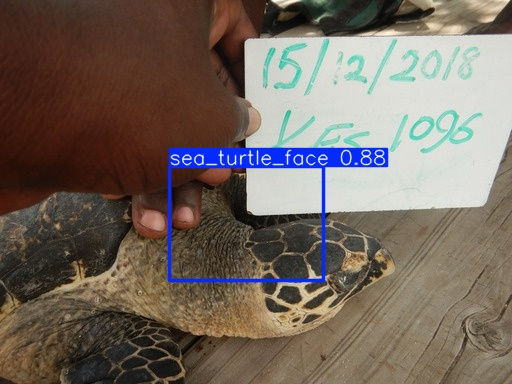

In [22]:
from IPython.display import Image, display
import os

# These paths are defined in your previous inference cell:
# INFERENCE_RESULTS_DIR = '/content/inference_results'
# final_inference_output_path = os.path.join(INFERENCE_RESULTS_DIR, 'sample_inference_run')

# --- CORRECTED LINE HERE ---
predicted_image_display_path = os.path.join(final_inference_output_path, '00309D7D.jpg') # <--- Changed to .jpg
# ---------------------------

if os.path.exists(predicted_image_display_path):
    print(f"\nDisplaying a sample predicted image ({predicted_image_display_path}):")
    display(Image(filename=predicted_image_display_path, width=600))
else:
    print(f"\nStill could not find predicted image at {predicted_image_display_path}.")
    print("Please double-check the 'ls -l' output for exact filenames and extensions.")